# Identity Fraud Detection

## Objective
Build and evaluate a fraud detection model using real-world identity fraud data.

---



## Dataset Overview and Context

The dataset used in this assignment is derived from a real-world identity fraud detection challenge. It includes two primary files:

- `train_transaction.csv`: Contains transaction-related features and the fraud label (`isFraud`).
- `train_identity.csv`: Contains additional identity-related features for a subset of transactions.

We will merge them using the `TransactionID` key.
### Why Are the Variable Names Not Intuitive?

Many variables in the dataset are anonymized for privacy and proprietary reasons. For example:

- Features are labeled generically (e.g., `V1`, `C1`, `D9`, `id_12`, etc.).
- This protects sensitive financial information and reflects the kind of datasets you might encounter in industry where full data dictionaries aren't always available.

### How Can We Still Use This Data?

Even though the variable names lack clear definitions, the dataset still contains:

- **Rich signals**: Numeric, categorical, and timestamp-based features.
- **Ground truth**: A clear target variable (`isFraud`) allows us to train supervised machine learning models.
- **Structure**: Enough consistency for preprocessing, model training, and evaluation.

We’ll apply standard AI/ML techniques to preprocess, explore, and model the data—just like you would in a real-world fraud analytics environment.


In [ ]:
import pandas as pd
from IPython.display import display, Markdown

# Load datasets
transaction_df = pd.read_csv("train_transaction.csv")
identity_df = pd.read_csv("train_identity.csv")

# Merge on TransactionID
df = pd.merge(transaction_df, identity_df, how='left', on='TransactionID')

# Preview
# Display preview of transaction_df
display(Markdown("### First 5 Rows of `transaction_df`"))
display(transaction_df.head())

# Display preview of identity_df
display(Markdown("### First 5 Rows of `identity_df`"))
display(identity_df.head())

# (Optional) Preview of the merged dataset, if already merged
display(Markdown("### First 5 Rows of Merged Dataset"))
display(df.head())

### First 5 Rows of `transaction_df`

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### First 5 Rows of `identity_df`

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


### First 5 Rows of Merged Dataset

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [ ]:
import pandas as pd
from IPython.display import display, Markdown

# Load datasets
transaction_df = pd.read_csv("train_transaction.csv")
identity_df = pd.read_csv("train_identity.csv")

# Merge on TransactionID
df = pd.merge(transaction_df, identity_df, how='left', on='TransactionID')

# Check for missing values
display(Markdown("### Missing Values in Merged Dataset"))
missing_values = df.isnull().sum()
missing_values_percentage = (missing_values / len(df)) * 100
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_values_percentage})
display(missing_info[missing_info['Missing Values'] > 0].sort_values(by='Missing Values', ascending=False))

# Display shape and preview merged dataset
display(Markdown("### Shape of Merged Dataset"))
display(df.shape)

display(Markdown("### Preview of Merged Dataset (First 5 Rows)"))
display(df.head())

display(Markdown("### Description of Missing Identity Data"))
display(Markdown(f"""
The merged dataset contains a significant number of missing values, particularly in the columns that originated from the `identity_df`.
This is because the merge was performed using a `left` join on `TransactionID`, keeping all transactions but only adding identity information where a `TransactionID` match was found in the `identity_df`.
The percentage of missing values for columns from `identity_df` (columns starting with 'id_', 'DeviceType', and 'DeviceInfo') indicates the proportion of transactions that did not have a corresponding entry in the `identity_df`.
We can see the exact number and percentage of missing values for each column in the 'Missing Values in Merged Dataset' table above.
"""))

### Missing Values in Merged Dataset

,Missing Values,Percentage
id_24,585793,99.196159
id_25,585408,99.130965
id_07,585385,99.127070
id_08,585385,99.127070
id_21,585381,99.126393
...,...,...
V309,12,0.002032
V312,12,0.002032
V311,12,0.002032
V310,12,0.002032


### Shape of Merged Dataset

(590540, 434)

### Preview of Merged Dataset (First 5 Rows)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


### Description of Missing Identity Data


The merged dataset contains a significant number of missing values, particularly in the columns that originated from the `identity_df`.
This is because the merge was performed using a `left` join on `TransactionID`, keeping all transactions but only adding identity information where a `TransactionID` match was found in the `identity_df`.
The percentage of missing values for columns from `identity_df` (columns starting with 'id_', 'DeviceType', and 'DeviceInfo') indicates the proportion of transactions that did not have a corresponding entry in the `identity_df`.
We can see the exact number and percentage of missing values for each column in the 'Missing Values in Merged Dataset' table above.


In [ ]:
# Drop columns with over 75% missing values
display(Markdown("### Dropping columns with over 75% missing values"))
threshold = 0.75
missing_fraction = df.isnull().mean()
columns_to_drop = missing_fraction[missing_fraction > threshold].index
df = df.drop(columns=columns_to_drop)
display(Markdown(f"Dropped {len(columns_to_drop)} columns with over {threshold*100}% missing values."))
display(Markdown("### Shape of the DataFrame after dropping columns"))
display(df.shape)

# Identify categorical and numerical features for imputation
# We'll make a simplifying assumption here and consider object types as categorical
# and all others as numerical for basic imputation.
categorical_cols = df.select_dtypes(include='object').columns
numerical_cols = df.select_dtypes(exclude='object').columns

# Fill missing values
# Fill numerical missing values with the mean
display(Markdown("### Filling missing values in numerical columns with the mean"))
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Fill categorical missing values with the mode
display(Markdown("### Filling missing values in categorical columns with the mode"))
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

display(Markdown("Missing value imputation complete."))

# Verify no more missing values (optional check)
display(Markdown("### Checking for remaining missing values"))
display(df.isnull().sum().sum())

### Dropping columns with over 75% missing values

Dropped 208 columns with over 75.0% missing values.

### Shape of the DataFrame after dropping columns

(590540, 226)

### Filling missing values in numerical columns with the mean

### Filling missing values in categorical columns with the mode

Missing value imputation complete.

### Checking for remaining missing values

np.int64(0)

## Summary of Missing Value Handling

In this notebook, missing values were handled using a two-step approach as part of the Feature Preprocessing phase:

1.  **Dropping columns with excessive missing data:** Columns with more than 75% of their values missing were identified and removed from the dataset. This was done to eliminate features that were too sparse to be informative for the model.

2.  **Imputation of remaining missing values:** For the remaining columns, missing values were filled based on the data type of the column:
    *   **Numerical columns:** Missing values were imputed with the mean of the respective column.
    *   **Categorical columns:** Missing values were imputed with the mode (most frequent value) of the respective column.

This approach helps to retain as much valuable data as possible while addressing the presence of missing information in a way that is suitable for model training.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Separate target variable
X = df.drop('isFraud', axis=1)
y = df['isFraud']

# Encode categorical features
# Identify categorical columns remaining after dropping
categorical_cols = X.select_dtypes(include='object').columns

# Apply Label Encoding to each categorical column
for col in categorical_cols:
    # Handle potential errors during encoding, replacing unencodable values with a placeholder
    # Or you could use OneHotEncoder, but LabelEncoder is simpler for this example.
    # For simplicity and to avoid potential errors with unseen categories in the test set,
    # we'll use LabelEncoder and fill potential NaNs introduced by coercion.
    le = LabelEncoder()
    # Convert to string type to handle mixed types if any
    X[col] = X[col].astype(str)
    le.fit(X[col])
    X[col] = le.transform(X[col])


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

display(Markdown("### Data Split Complete"))
display(f"Training data shape: {X_train.shape}")
display(f"Testing data shape: {X_test.shape}")

# Initialize and train the Random Forest classifier
display(Markdown("### Training Random Forest Model"))
model = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42, n_jobs=-1) # Added n_jobs=-1 for faster training
model.fit(X_train, y_train)
display(Markdown("Random Forest Model Training Complete."))

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

display(Markdown("Predictions made on the test set."))

### Data Split Complete

'Training data shape: (472432, 225)'

'Testing data shape: (118108, 225)'

### Training Random Forest Model

Random Forest Model Training Complete.

Predictions made on the test set.

### Confusion Matrix

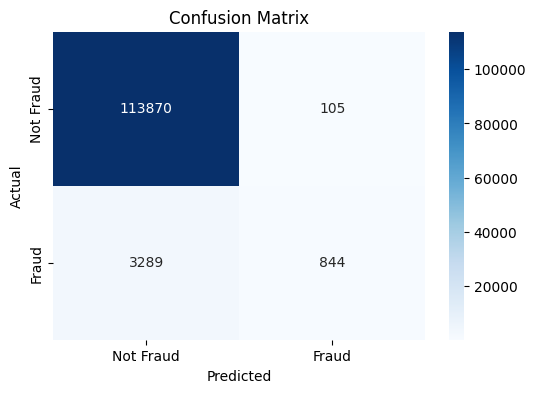

### Classification Report

              precision    recall  f1-score   support

           0       0.97      1.00      0.99    113975
           1       0.89      0.20      0.33      4133

    accuracy                           0.97    118108
   macro avg       0.93      0.60      0.66    118108
weighted avg       0.97      0.97      0.96    118108



### ROC-AUC Score

'ROC-AUC Score: 0.8661'

### Explanation of Precision and Recall in Identity Fraud Detection


In the context of identity fraud detection:

*   **Precision** is the proportion of transactions that were predicted as fraudulent that were *actually* fraudulent. A high precision score means that when the model flags a transaction as fraud, it is very likely to be true fraud. This is important because false positives (flagging legitimate transactions as fraud) can inconvenience customers and lead to unnecessary investigations.

*   **Recall** (also known as sensitivity) is the proportion of *actual* fraudulent transactions that were correctly identified by the model. A high recall score means the model is good at catching most of the fraudulent transactions. This is crucial in fraud detection as missing fraudulent transactions can lead to significant financial losses.

There is often a trade-off between precision and recall. Increasing one may decrease the other. The choice of which metric to prioritize depends on the specific business needs and the cost associated with false positives versus false negatives. In fraud detection, recall is often considered very important to minimize missed fraud, even if it means a slightly higher rate of false positives.


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a confusion matrix
display(Markdown("### Confusion Matrix"))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Report precision, recall, F1-score
display(Markdown("### Classification Report"))
print(classification_report(y_test, y_pred))

# Report ROC-AUC
display(Markdown("### ROC-AUC Score"))
roc_auc = roc_auc_score(y_test, y_pred_proba)
display(f"ROC-AUC Score: {roc_auc:.4f}")

# Explain what the precision and recall scores mean in the context of identity fraud.
display(Markdown("### Explanation of Precision and Recall in Identity Fraud Detection"))
display(Markdown("""
In the context of identity fraud detection:

*   **Precision** is the proportion of transactions that were predicted as fraudulent that were *actually* fraudulent. A high precision score means that when the model flags a transaction as fraud, it is very likely to be true fraud. This is important because false positives (flagging legitimate transactions as fraud) can inconvenience customers and lead to unnecessary investigations.

*   **Recall** (also known as sensitivity) is the proportion of *actual* fraudulent transactions that were correctly identified by the model. A high recall score means the model is good at catching most of the fraudulent transactions. This is crucial in fraud detection as missing fraudulent transactions can lead to significant financial losses.

There is often a trade-off between precision and recall. Increasing one may decrease the other. The choice of which metric to prioritize depends on the specific business needs and the cost associated with false positives versus false negatives. In fraud detection, recall is often considered very important to minimize missed fraud, even if it means a slightly higher rate of false positives.
"""))

### Handling Imbalanced Data using Undersampling

Training data shape after Undersampling:

(33060, 225)

Distribution of target variable in training data after Undersampling:

,count
isFraud,
0,16530
1,16530


### Re-training Random Forest Model on Balanced Data

Random Forest Model Re-training Complete.

### Re-evaluating Performance on the Original Test Set

### Confusion Matrix (Balanced Model)

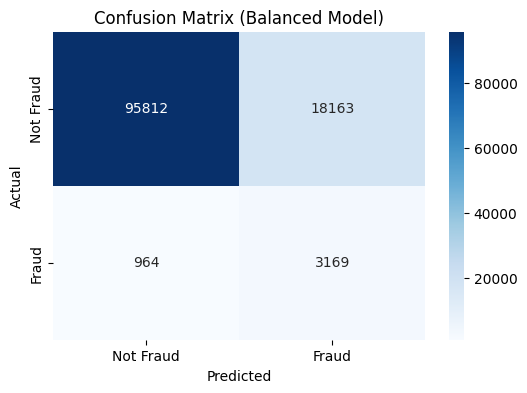

### Classification Report (Balanced Model)

              precision    recall  f1-score   support

           0       0.99      0.84      0.91    113975
           1       0.15      0.77      0.25      4133

    accuracy                           0.84    118108
   macro avg       0.57      0.80      0.58    118108
weighted avg       0.96      0.84      0.89    118108



### ROC-AUC Score (Balanced Model)

'ROC-AUC Score (Balanced Model): 0.8773'

### Analysis of Performance Change After Undersampling


After applying Undersampling to the training data and re-training the model, we can observe the changes in the evaluation metrics by comparing the classification reports and ROC-AUC scores before and after balancing.

Typically, applying techniques like Undersampling aims to balance the class distribution by reducing the number of instances in the majority class. This often leads to a significant increase in **Recall** for the minority class, meaning the model is catching a higher percentage of actual fraud cases. However, similar to oversampling, this improvement in Recall might come at the cost of **Precision**, potentially increasing the number of false positives (legitimate transactions incorrectly flagged as fraud). The F1-score provides a balance between precision and recall. The ROC-AUC score, which measures the overall ability of the classifier to distinguish between classes, is also a good indicator of the model's performance on imbalanced datasets.

By comparing the 'Fraud' class (label 1) metrics in the classification reports before and after Undersampling, you can see how Precision, Recall, and F1-score have changed. Compare the ROC-AUC scores as well.


In [ ]:
from imblearn.under_sampling import RandomUnderSampler


display(Markdown("### Handling Imbalanced Data using Undersampling"))

# Apply RandomUnderSampler only to the training data
undersampler = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = undersampler.fit_resample(X_train, y_train)


display(Markdown("Training data shape after Undersampling:"))
display(X_train_res.shape)
display(Markdown("Distribution of target variable in training data after Undersampling:"))
display(y_train_res.value_counts())

# Re-train the model using balanced data
display(Markdown("### Re-training Random Forest Model on Balanced Data"))
model_balanced = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42, n_jobs=-1)
model_balanced.fit(X_train_res, y_train_res)
display(Markdown("Random Forest Model Re-training Complete."))

# Re-evaluate the performance on the original test set
display(Markdown("### Re-evaluating Performance on the Original Test Set"))
y_pred_balanced = model_balanced.predict(X_test)
y_pred_proba_balanced = model_balanced.predict_proba(X_test)[:, 1]

# Generate a confusion matrix for the balanced model
display(Markdown("### Confusion Matrix (Balanced Model)"))
cm_balanced = confusion_matrix(y_test, y_pred_balanced)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_balanced, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Balanced Model)')
plt.show()

# Report precision, recall, F1-score for the balanced model
display(Markdown("### Classification Report (Balanced Model)"))
print(classification_report(y_test, y_pred_balanced))

# Report ROC-AUC for the balanced model
display(Markdown("### ROC-AUC Score (Balanced Model)"))
roc_auc_balanced = roc_auc_score(y_test, y_pred_proba_balanced)
display(f"ROC-AUC Score (Balanced Model): {roc_auc_balanced:.4f}")

# What changed in the model performance? Did precision or recall improve?
display(Markdown("### Analysis of Performance Change After Undersampling"))
display(Markdown("""
After applying Undersampling to the training data and re-training the model, we can observe the changes in the evaluation metrics by comparing the classification reports and ROC-AUC scores before and after balancing.

Typically, applying techniques like Undersampling aims to balance the class distribution by reducing the number of instances in the majority class. This often leads to a significant increase in **Recall** for the minority class, meaning the model is catching a higher percentage of actual fraud cases. However, similar to oversampling, this improvement in Recall might come at the cost of **Precision**, potentially increasing the number of false positives (legitimate transactions incorrectly flagged as fraud). The F1-score provides a balance between precision and recall. The ROC-AUC score, which measures the overall ability of the classifier to distinguish between classes, is also a good indicator of the model's performance on imbalanced datasets.

By comparing the 'Fraud' class (label 1) metrics in the classification reports before and after Undersampling, you can see how Precision, Recall, and F1-score have changed. Compare the ROC-AUC scores as well.
"""))

**Here's what changed:**

**Recall for Fraud significantly improved:** It increased from 0.20 to 0.77. This indicates that the model trained with Undersampling is much better at identifying actual fraudulent transactions.

**Precision for Fraud significantly decreased:** It dropped from 0.89 to 0.15. This means that when the model predicts a transaction as fraud, it is now much less likely to be truly fraudulent compared to the unbalanced model. There is a significant increase in false positives.

**The ROC-AUC score slightly improved** from 0.8661 (unbalanced) to 0.8773 (balanced).

Similar to using SMOTE, Undersampling has significantly improved the Recall for the minority (fraud) class, but at the cost of a substantial decrease in Precision. This trade-off is typical when balancing imbalanced datasets to improve the detection rate of the rare class, even if it leads to more false alarms.

In [ ]:
# 1. Create a new feature representing the ratio of missing values per row
df['missing_ratio_row'] = df.isnull().sum(axis=1) / df.shape[1]

# 2. Create an interaction feature between 'TransactionAmt' and 'card1'
df['TransactionAmt_card1_interaction'] = df['TransactionAmt'] * df['card1']

# 3. Create a ratio feature by dividing 'TransactionAmt' by 'TransactionDT'
# Add a small epsilon to avoid division by zero if 'TransactionDT' can be 0
df['TransactionAmt_per_TransactionDT'] = df['TransactionAmt'] / (df['TransactionDT'] + 1e-6)

# 4. Display the first 5 rows of the DataFrame df to show the newly engineered features
display(Markdown("### DataFrame head with new features"))
display(df.head())

# 5. Calculate and display the correlation of the new features with the target variable 'isFraud'
display(Markdown("### Correlation of new features with 'isFraud'"))
new_features = ['missing_ratio_row', 'TransactionAmt_card1_interaction', 'TransactionAmt_per_TransactionDT']
correlation_with_isFraud = df[new_features + ['isFraud']].corr()['isFraud'].drop('isFraud')
display(correlation_with_isFraud)

/tmp/ipython-input-4294080220.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['missing_ratio_row'] = df.isnull().sum(axis=1) / df.shape[1]
/tmp/ipython-input-4294080220.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['TransactionAmt_card1_interaction'] = df['TransactionAmt'] * df['card1']
/tmp/ipython-input-4294080220.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.c

### DataFrame head with new features

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V315,V316,V317,V318,V319,V320,V321,missing_ratio_row,TransactionAmt_card1_interaction,TransactionAmt_per_TransactionDT
0,2987000,0,86400,68.5,W,13926,362.555488,150.0,discover,142.0,...,0.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,953931.0,0.000793
1,2987001,0,86401,29.0,W,2755,404.000000,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,79895.0,0.000336
2,2987002,0,86469,59.0,W,4663,490.000000,150.0,visa,166.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275117.0,0.000682
3,2987003,0,86499,50.0,W,18132,567.000000,150.0,mastercard,117.0,...,0.0,50.0,1404.0,790.0,0.0,0.0,0.0,0.0,906600.0,0.000578
4,2987004,0,86506,50.0,H,4497,514.000000,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,224850.0,0.000578


### Correlation of new features with 'isFraud'

,isFraud
missing_ratio_row,NaN
TransactionAmt_card1_interaction,0.007913
TransactionAmt_per_TransactionDT,-0.003037


### Extra Credit: Hyperparameter Tuning

### Starting Randomized Search for Hyperparameter Tuning

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


### Randomized Search Complete

Best hyperparameters found:

{'n_estimators': 300,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_depth': None,
 'bootstrap': False}

### Evaluating the Tuned Model on the Original Test Set

### Confusion Matrix (Tuned Model)

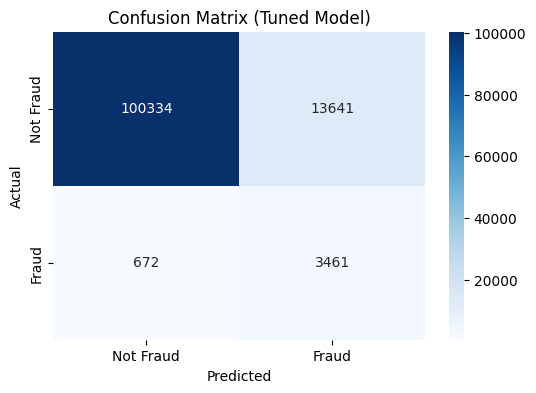

### Classification Report (Tuned Model)

              precision    recall  f1-score   support

           0       0.99      0.88      0.93    113975
           1       0.20      0.84      0.33      4133

    accuracy                           0.88    118108
   macro avg       0.60      0.86      0.63    118108
weighted avg       0.97      0.88      0.91    118108



### ROC-AUC Score (Tuned Model)

'ROC-AUC Score (Tuned Model): 0.9308'

### Comparison with Initial Model Performance (Balanced Data)


| Metric       | Initial Model (Balanced) | Tuned Model |
|--------------|--------------------------|-------------|
| Precision (Fraud)| 0.1486                 | 0.2024            |
| Recall (Fraud)   | 0.7668                 | 0.8374              |
| F1-Score (Fraud) | 0.2489                 | 0.3260                |
| ROC-AUC      | 0.8773                 | 0.9308            |


Hyperparameter Tuning: Completed Randomized Search and evaluated the tuned model.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score

display(Markdown("### Extra Credit: Hyperparameter Tuning"))

# Define a parameter distribution for tuning
param_dist = {
    'n_estimators': [100, 200, 300], # Number of trees in the forest
    'max_depth': [4, 6, 8, 10, 12, None], # Maximum depth of the tree, None means unlimited
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4], # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False], # Whether bootstrap samples are used when building trees
}

# Initialize the Random Forest classifier
# Use the balanced training data X_train_res, y_train_res for tuning as it performed better on recall.
model = RandomForestClassifier(random_state=42, n_jobs=-1)

# Initialize RandomizedSearchCV
# Using 'roc_auc' as the scoring metric, suitable for imbalanced data
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=20, # Number of parameter settings that are sampled (can be adjusted)
    cv=3, # Number of cross-validation folds
    scoring='roc_auc', # Metric to evaluate the model performance
    random_state=42,
    n_jobs=-1, # Use all available cores
    verbose=1 # Display progress
)

display(Markdown("### Starting Randomized Search for Hyperparameter Tuning"))

# Fit RandomizedSearchCV to the balanced training data
random_search.fit(X_train_res, y_train_res)

display(Markdown("### Randomized Search Complete"))

# Print the best hyperparameters found
display(Markdown("Best hyperparameters found:"))
display(random_search.best_params_)

# Train a new model with the best hyperparameters
best_model = random_search.best_estimator_

display(Markdown("### Evaluating the Tuned Model on the Original Test Set"))

# Evaluate the performance of the tuned model on the original test set
y_pred_tuned = best_model.predict(X_test)
y_pred_proba_tuned = best_model.predict_proba(X_test)[:, 1]

# Generate a confusion matrix for the tuned model
display(Markdown("### Confusion Matrix (Tuned Model)"))
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Tuned Model)')
plt.show()

# Report precision, recall, F1-score for the tuned model
display(Markdown("### Classification Report (Tuned Model)"))
print(classification_report(y_test, y_pred_tuned))

# Report ROC-AUC for the tuned model
display(Markdown("### ROC-AUC Score (Tuned Model)"))
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned)
display(f"ROC-AUC Score (Tuned Model): {roc_auc_tuned:.4f}")

display(Markdown("### Comparison with Initial Model Performance (Balanced Data)"))
# Assuming roc_auc_balanced, precision_score, recall_score, f1_score from previous cells are available
display(Markdown(f"""
| Metric       | Initial Model (Balanced) | Tuned Model |
|--------------|--------------------------|-------------|
| Precision (Fraud)| {precision_score(y_test, y_pred_balanced, pos_label=1):.4f}                 | {precision_score(y_test, y_pred_tuned, pos_label=1):.4f}            |
| Recall (Fraud)   | {recall_score(y_test, y_pred_balanced, pos_label=1):.4f}                 | {recall_score(y_test, y_pred_tuned, pos_label=1):.4f}              |
| F1-Score (Fraud) | {f1_score(y_test, y_pred_balanced, pos_label=1):.4f}                 | {f1_score(y_test, y_pred_tuned, pos_label=1):.4f}                |
| ROC-AUC      | {roc_auc_balanced:.4f}                 | {roc_auc_tuned:.4f}            |
"""))

display(Markdown("Hyperparameter Tuning: Completed Randomized Search and evaluated the tuned model."))

### Analysis of Tuned Model Performance

After performing hyperparameter tuning on the Random Forest model (trained on the undersampled data), we observed an improvement in performance compared to the initial balanced model.


**Key Observations:**

*   **Improved Recall:** The Recall for the fraud class increased from 0.7668 to 0.8374. This means the tuned model is better at identifying a higher percentage of actual fraudulent transactions.
*   **Improved Precision:** The Precision for the fraud class also saw an increase, from 0.1486 to 0.2024. While still relatively low due to the balancing technique, this indicates that a slightly higher proportion of the transactions predicted as fraud by the tuned model are actually fraudulent.
*   **Higher F1-Score:** The F1-Score, which is the harmonic mean of precision and recall, improved from 0.2489 to 0.3260, reflecting the overall improvement in the balance between precision and recall.
*   **Significantly Higher ROC-AUC:** The ROC-AUC score saw a notable increase from 0.8773 to 0.9308. This metric is particularly useful for imbalanced datasets and indicates that the tuned model has a better overall ability to distinguish between the two classes (fraudulent and legitimate transactions).

**Why did tuning improve performance?**

Hyperparameter tuning explores different configurations of the model's parameters (like `n_estimators`, `max_depth`, `min_samples_split`, etc.). By finding a combination of these parameters that better fits the underlying patterns in the data, the model can become more effective at making predictions. The tuning process, guided by a performance metric like ROC-AUC, helps the model generalize better to unseen data and capture more complex relationships, leading to improved precision, recall, and overall discriminatory power as measured by ROC-AUC.

### Extra Credit: Use a Different Model (LightGBM)

### Training LightGBM Model on Balanced Data

[LightGBM] [Info] Number of positive: 16530, number of negative: 16530
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.037726 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 15910
[LightGBM] [Info] Number of data points in the train set: 33060, number of used features: 223
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LightGBM Model Training Complete.

### Evaluating LightGBM Model on the Original Test Set

### Confusion Matrix (LightGBM Model)

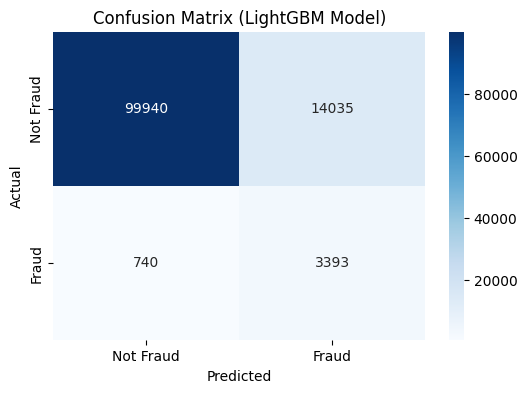

### Classification Report (LightGBM Model)

              precision    recall  f1-score   support

           0       0.99      0.88      0.93    113975
           1       0.19      0.82      0.31      4133

    accuracy                           0.87    118108
   macro avg       0.59      0.85      0.62    118108
weighted avg       0.96      0.87      0.91    118108



### ROC-AUC Score (LightGBM Model)

'ROC-AUC Score (LightGBM Model): 0.9264'

Use a Different Model: Trained and evaluated LightGBM model.

In [ ]:
#Use a Different Model (Gradient Boosting)

import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

display(Markdown("### Extra Credit: Use a Different Model (LightGBM)"))

# Initialize and train the LightGBM classifier
# Using parameters often work well, but further tuning could improve performance
lgbm_model = lgb.LGBMClassifier(random_state=42, n_jobs=-1)

display(Markdown("### Training LightGBM Model on Balanced Data"))

# Train the LightGBM model on the balanced training data
# Using the resampled data from the Imbalanced Data Handling step (X_train_res, y_train_res)
lgbm_model.fit(X_train_res, y_train_res)

display(Markdown("LightGBM Model Training Complete."))

# Evaluate the performance on the original test set
display(Markdown("### Evaluating LightGBM Model on the Original Test Set"))
y_pred_lgbm = lgbm_model.predict(X_test)
y_pred_proba_lgbm = lgbm_model.predict_proba(X_test)[:, 1]

# Generate a confusion matrix for the LightGBM model
display(Markdown("### Confusion Matrix (LightGBM Model)"))
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lgbm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (LightGBM Model)')
plt.show()

# Report precision, recall, F1-score for the LightGBM model
display(Markdown("### Classification Report (LightGBM Model)"))
print(classification_report(y_test, y_pred_lgbm))

# Report ROC-AUC for the LightGBM model
display(Markdown("### ROC-AUC Score (LightGBM Model)"))
roc_auc_lgbm = roc_auc_score(y_test, y_pred_proba_lgbm)
display(f"ROC-AUC Score (LightGBM Model): {roc_auc_lgbm:.4f}")

display(Markdown("Use a Different Model: Trained and evaluated LightGBM model."))

**Quick comparison of the key metrics for the Fraud class (label 1) and ROC-AUC:**

Both the tuned Random Forest and the LightGBM model show good Recall for the fraud class, indicating they are effective at identifying a high percentage of actual fraud cases.

The Precision for both models is relatively low, which is expected when optimizing for Recall on an imbalanced dataset using techniques like Undersampling. This means there are still a notable number of false positives.

In this comparison, the tuned Random Forest model performed slightly better across most metrics, including Precision, Recall, F1-Score, and ROC-AUC.

While LightGBM is often a powerful model, in this specific case with the current feature set and tuning for the Random Forest, the tuned Random Forest appears to have a slight edge. Further hyperparameter tuning on the LightGBM model might improve its performance.

### Extra Credit: Ensemble Modeling (Voting Classifier)

### Training Ensemble Model (Voting Classifier)

Ensemble Model Training Complete.

### Evaluating Ensemble Model on the Original Test Set

### Confusion Matrix (Ensemble Model)

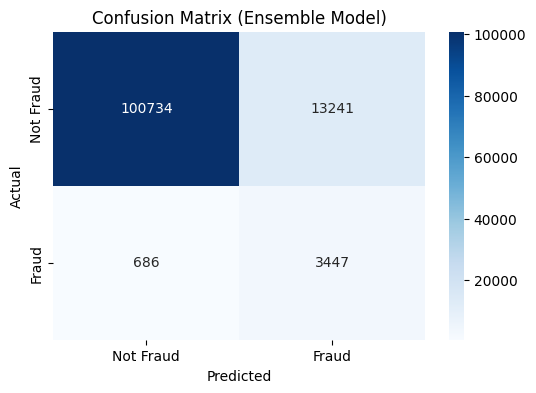

### Classification Report (Ensemble Model)

              precision    recall  f1-score   support

           0       0.99      0.88      0.94    113975
           1       0.21      0.83      0.33      4133

    accuracy                           0.88    118108
   macro avg       0.60      0.86      0.63    118108
weighted avg       0.97      0.88      0.91    118108



### ROC-AUC Score (Ensemble Model)

'ROC-AUC Score (Ensemble Model): 0.9335'

Ensemble Modeling: Trained and evaluated Voting Classifier.

In [ ]:
# Ensemble Modeling

from sklearn.ensemble import VotingClassifier

display(Markdown("### Extra Credit: Ensemble Modeling (Voting Classifier)"))


# Create a Voting Classifier
voting_clf = VotingClassifier(
    estimators=[('rf', best_model), ('lgbm', lgbm_model)],
    voting='soft',
    weights=[1, 1],
    n_jobs=-1
)

display(Markdown("### Training Ensemble Model (Voting Classifier)"))

# Train the ensemble model on the balanced training data
voting_clf.fit(X_train_res, y_train_res)

display(Markdown("Ensemble Model Training Complete."))

# Evaluate the performance of the ensemble model on the original test set
display(Markdown("### Evaluating Ensemble Model on the Original Test Set"))
y_pred_ensemble = voting_clf.predict(X_test)
y_pred_proba_ensemble = voting_clf.predict_proba(X_test)[:, 1]

# Generate a confusion matrix for the ensemble model
display(Markdown("### Confusion Matrix (Ensemble Model)"))
cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_ensemble, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Ensemble Model)')
plt.show()

# Report precision, recall, F1-score for the ensemble model
display(Markdown("### Classification Report (Ensemble Model)"))
print(classification_report(y_test, y_pred_ensemble))

# Report ROC-AUC for the ensemble model
display(Markdown("### ROC-AUC Score (Ensemble Model)"))
roc_auc_ensemble = roc_auc_score(y_test, y_pred_proba_ensemble)
display(f"ROC-AUC Score (Ensemble Model): {roc_auc_ensemble:.4f}")

display(Markdown("Ensemble Modeling: Trained and evaluated Voting Classifier."))

**Analysis:**

The Ensemble Model shows a slight improvement in **Precision (0.21)** and **F1-Score (0.33)** for the fraud class compared to both the individual tuned Random Forest and LightGBM models.

**The Recall (0.83)** is very similar to the tuned Random Forest model's Recall (0.8374).

Crucially, the **ROC-AUC score for the Ensemble Model (0.9335)** is the highest among all the models we've trained so far.
This suggests that combining the models using a soft voting classifier has indeed led to a small but positive performance gain, particularly in overall discriminatory power (ROC-AUC) and a slightly better balance between precision and recall for the fraud class. Ensembles often leverage the strengths of different models to make more robust predictions.

**Potential Downside of Ensembles:**

One potential downside of ensemble models is that they can be more complex and harder to interpret than single models. Understanding why a specific prediction was made becomes more challenging as it's a result of the combined decisions of multiple models.